## Example Data Notebook for TAQ Database

This notebook walks through how to access the TAQ-Clickhouse database remotely through SCP which is utilized for file transfer.

In [1]:
from pathlib import Path
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing.get_data import get_trades, get_quotes, get_ref

### Setup Credentials for Remote Access


In [2]:
# Define the absolute path to the module
module_path = Path('data_preprocessing/get_data.py')

# Ensure the module file exists
assert module_path.is_file(), f"File does not exist: {module_path}"

# Use importlib to load the module
spec = importlib.util.spec_from_file_location("get_data", module_path)
get_data = importlib.util.module_from_spec(spec)
spec.loader.exec_module(get_data)

### Sample Trade Query

In [3]:
symbols = ["DIA"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "50"
columns='ALL'

get_trades(symbols, start_date, end_date, row_limit, columns)

Output for symbol DIA:
Errors for symbol DIA:


In [4]:
data=pd.read_csv('data/trades_DIA_20200106-20200107.csv.gz', compression='gzip')
data['Time']=pd.to_datetime(data['Time'])
data.head(5)

,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,YearMonth
0,0,2020-01-06 04:00:00.017754,2020-01-06,P,DIA,15,285.00,TI,C,N,0,41401,52983525027891,NaN,40000017591808,NaN,0,202001
1,1,2020-01-06 04:00:00.040087,2020-01-06,P,DIA,6,284.25,TI,C,N,0,42301,52983525027894,NaN,40000039940608,NaN,0,202001
2,2,2020-01-06 04:09:37.364256,2020-01-06,P,DIA,281,284.20,FT,C,N,0,45901,52983525027923,NaN,40937363898112,NaN,1,202001
3,3,2020-01-06 04:09:37.364285,2020-01-06,T,DIA,500,284.20,FT,C,N,0,46001,3472338191832602203,NaN,40937363633707,NaN,1,202001
4,4,2020-01-06 04:09:46.653987,2020-01-06,T,DIA,52,284.22,TI,C,N,0,46201,3472338191832602214,NaN,40946653359339,NaN,0,202001


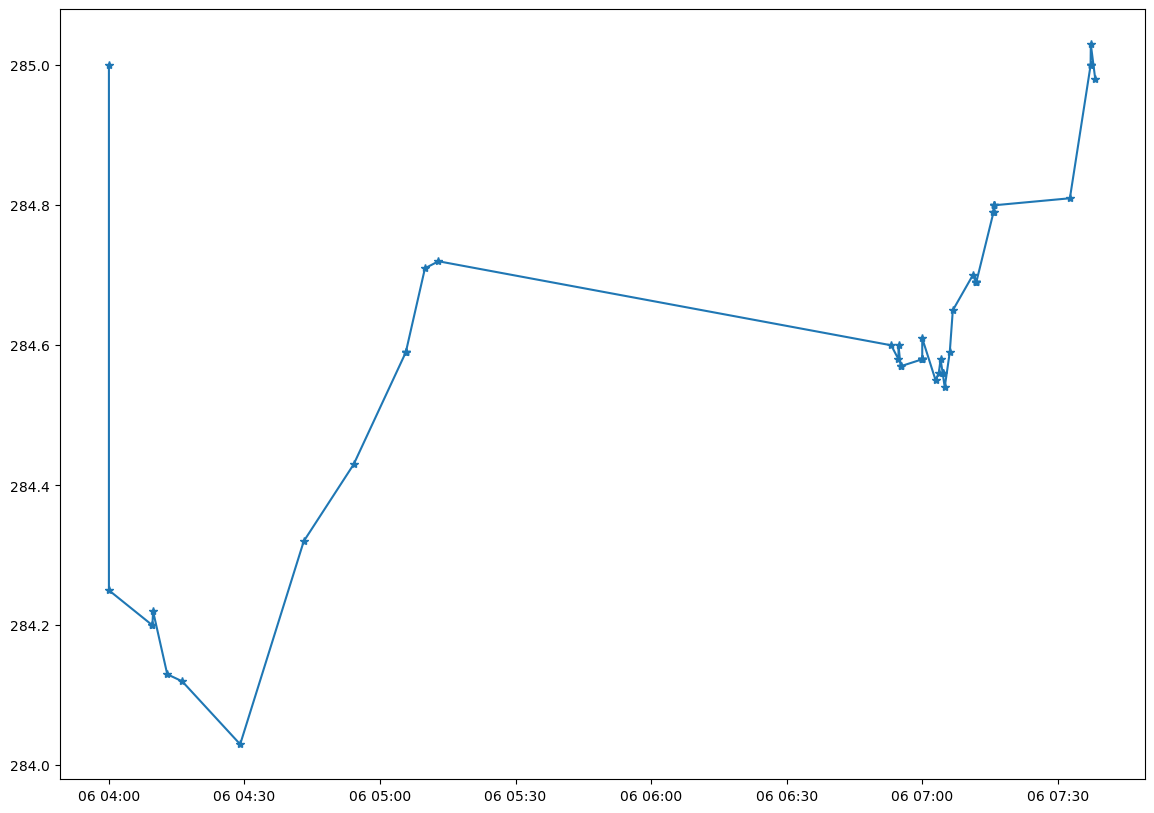

In [5]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Trade_Price'],marker='*')

### Error for missing data

Be careful, despite the error being populated, the last file saved on the server will still be transferred to your local machine



In [6]:
symbols = ["DIA"]
start_date = "2020-01-05"
end_date = "2020-01-06"
row_limit = "50"
columns='ALL'

get_trades(symbols, start_date, end_date, row_limit, columns)

Output for symbol DIA:
... No data found for DIA between 2020-01-05 and 2020-01-06.
Errors for symbol DIA:


### Larger Row Limit

In [7]:
symbols = ["DIA"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "1000000"
columns='ALL'

get_trades(symbols, start_date, end_date, row_limit, columns)

Output for symbol DIA:
Errors for symbol DIA:


In [8]:
data=pd.read_csv('data/trades_DIA_20200106-20200107.csv.gz', compression='gzip')
data['Time']=pd.to_datetime(data['Time'])

data.head(5)

,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,YearMonth
0,0,2020-01-06 04:00:00.017754,2020-01-06,P,DIA,15,285.00,TI,C,N,0,41401,52983525027891,NaN,40000017591808,NaN,0,202001
1,1,2020-01-06 04:00:00.040087,2020-01-06,P,DIA,6,284.25,TI,C,N,0,42301,52983525027894,NaN,40000039940608,NaN,0,202001
2,2,2020-01-06 04:09:37.364256,2020-01-06,P,DIA,281,284.20,FT,C,N,0,45901,52983525027923,NaN,40937363898112,NaN,1,202001
3,3,2020-01-06 04:09:37.364285,2020-01-06,T,DIA,500,284.20,FT,C,N,0,46001,3472338191832602203,NaN,40937363633707,NaN,1,202001
4,4,2020-01-06 04:09:46.653987,2020-01-06,T,DIA,52,284.22,TI,C,N,0,46201,3472338191832602214,NaN,40946653359339,NaN,0,202001


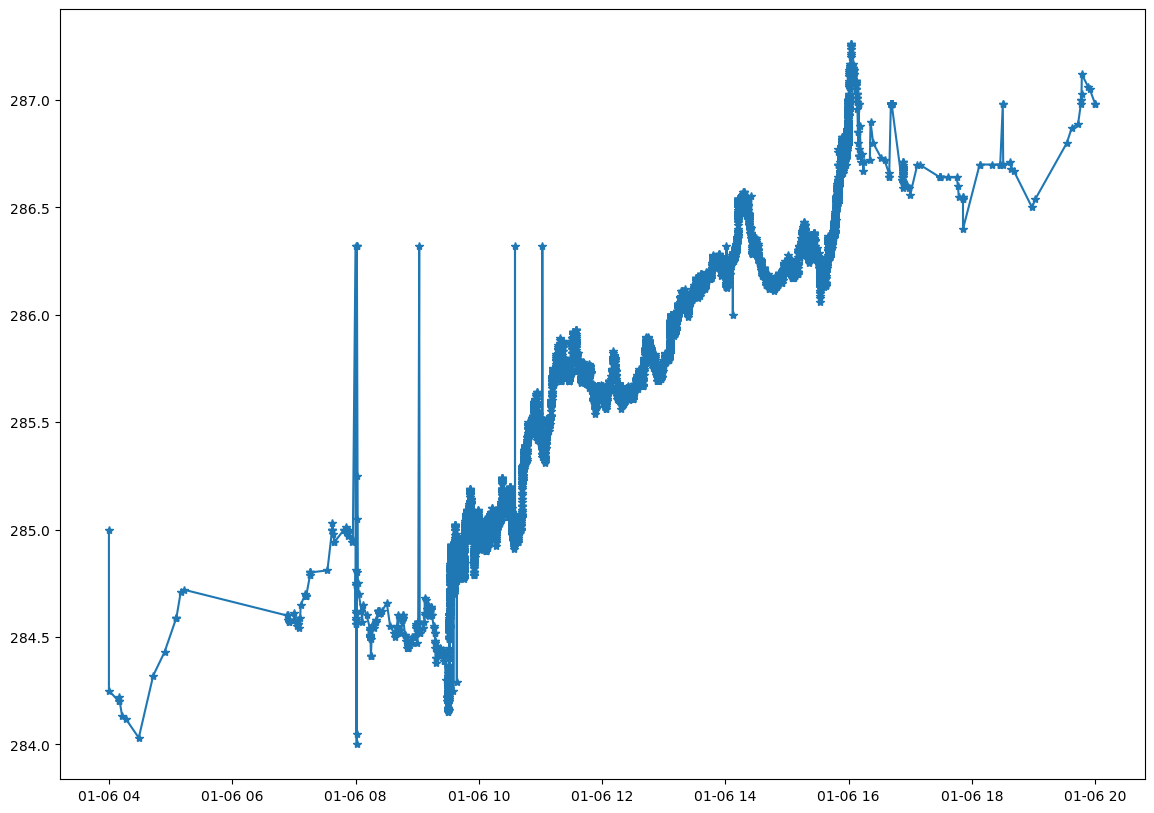

In [9]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Trade_Price'],marker='*')

### Multiple Days Fixed Symbol

In [10]:
symbols = ["AAPL"]
start_date = "2022-01-05"
end_date = "2022-01-06"
row_limit = "1000000000"
columns='ALL'

get_trades(symbols, start_date, end_date, row_limit, columns)

Output for symbol AAPL:
Errors for symbol AAPL:


In [11]:
data=pd.read_csv('data/trades_DIA_20200105-20200106.csv.gz', compression='gzip')
data['Time']=pd.to_datetime(data['Time'])
data.head(5)

,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,YearMonth
0,0,2020-01-06 04:00:00.017754,2020-01-06,P,DIA,15,285.00,TI,C,N,0,41401,52983525027891,NaN,40000017591808,NaN,0,202001
1,1,2020-01-06 04:00:00.040087,2020-01-06,P,DIA,6,284.25,TI,C,N,0,42301,52983525027894,NaN,40000039940608,NaN,0,202001
2,2,2020-01-06 04:09:37.364256,2020-01-06,P,DIA,281,284.20,FT,C,N,0,45901,52983525027923,NaN,40937363898112,NaN,1,202001
3,3,2020-01-06 04:09:37.364285,2020-01-06,T,DIA,500,284.20,FT,C,N,0,46001,3472338191832602203,NaN,40937363633707,NaN,1,202001
4,4,2020-01-06 04:09:46.653987,2020-01-06,T,DIA,52,284.22,TI,C,N,0,46201,3472338191832602214,NaN,40946653359339,NaN,0,202001


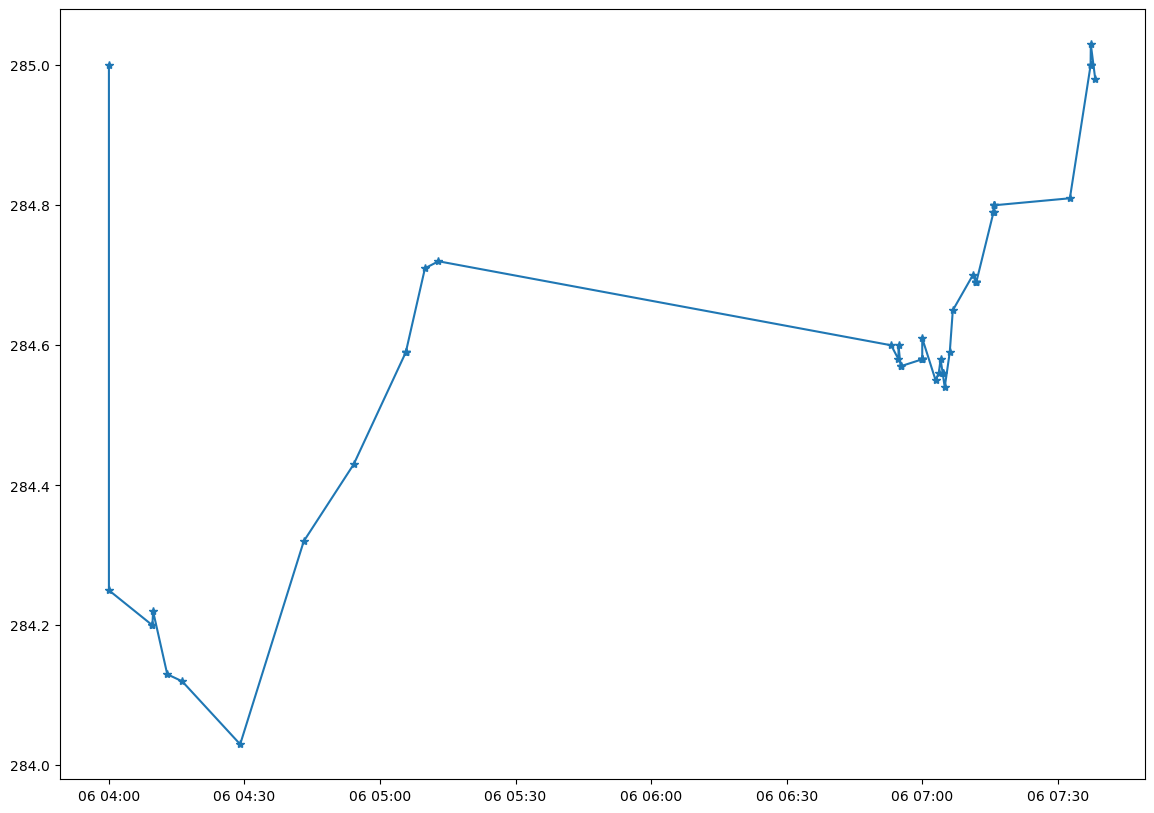

In [12]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Trade_Price'],marker='*')

### Single Day Multiple Symbols

In [13]:
symbols = ["DIA","AAPL"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "1000000"
columns='ALL'

get_trades(symbols, start_date, end_date, row_limit, columns)

Output for symbol DIA:
Errors for symbol DIA:
Output for symbol AAPL:
Errors for symbol AAPL:


### Quotes Data

In [14]:
symbols = ["AAPL"]
start_date = "2022-01-03"
end_date = "2022-01-04"
row_limit = "10000"
columns='ALL'

get_quotes(symbols, start_date, end_date, row_limit, columns)

Output for symbol AAPL:
Errors for symbol AAPL:


In [15]:
data=pd.read_csv('data/quotes_AAPL_20220103-20220104.csv.gz', compression='gzip')
data['Time']=pd.to_datetime(data['Time'])
data.head(5)

,Unnamed: 0,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,...,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,0,2022-01-03 03:59:00.091564,Z,AAPL,0.00,0.0,0.0,0.0,L,1252,...,0,NaN,NaN,NaN,35900088741000,NaN,NaN,,2022-01-03,202201
1,1,2022-01-03 03:59:00.198749,K,AAPL,0.00,0.0,0.0,0.0,L,2235,...,0,NaN,NaN,NaN,35900197520000,NaN,NaN,,2022-01-03,202201
2,2,2022-01-03 04:00:00.028174,Q,AAPL,177.92,4.0,0.0,0.0,R,4138,...,0,NaN,NaN,NaN,40000028160898,NaN,NaN,,2022-01-03,202201
3,3,2022-01-03 04:00:00.028307,Q,AAPL,177.92,4.0,178.8,4.0,R,4140,...,0,NaN,NaN,NaN,40000028294451,NaN,NaN,,2022-01-03,202201
4,4,2022-01-03 04:00:00.087199,P,AAPL,130.00,1.0,0.0,0.0,R,5834,...,0,NaN,NaN,NaN,40000086819840,NaN,NaN,,2022-01-03,202201


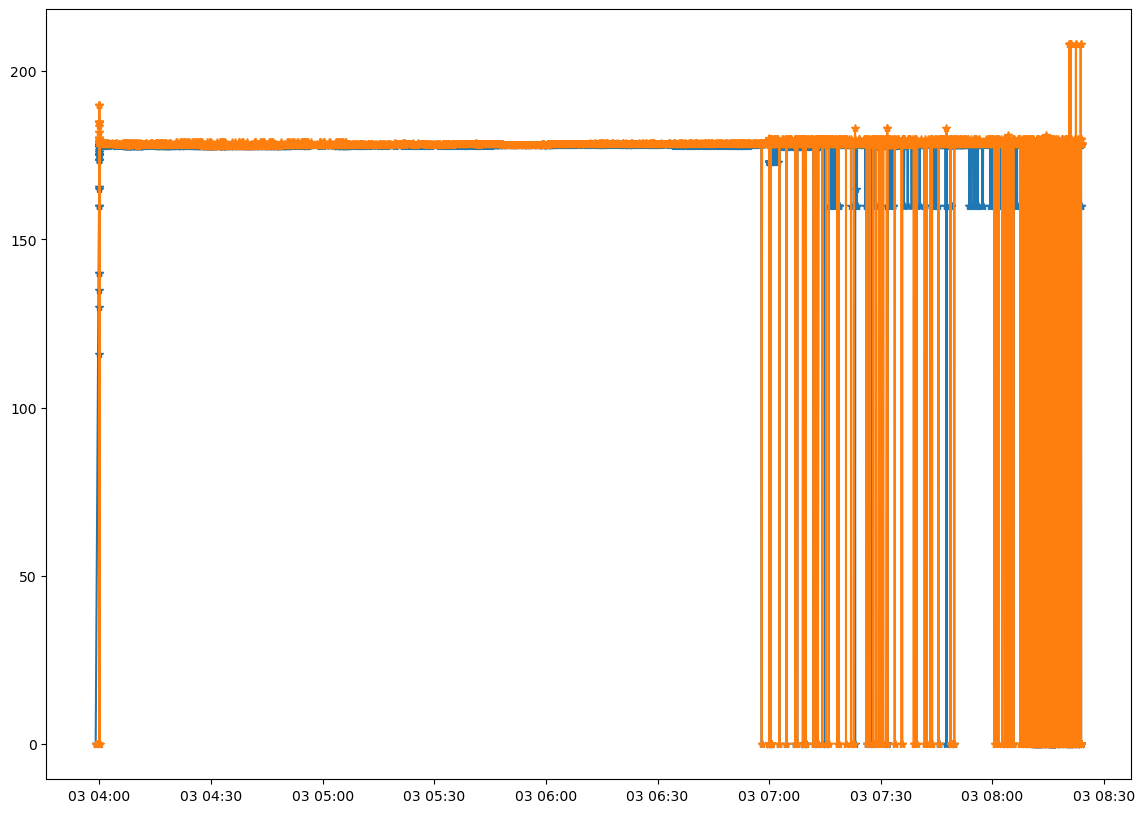

In [16]:
fig,ax=plt.subplots(figsize=(14,10))
ax.plot(data['Time'],data['Bid_Price'],marker='*')
ax.plot(data['Time'],data['Offer_Price'],marker='*')

### Reference Data Access

In [17]:
symbols = ["GME","AMC"]
start_date = "2019-01-01"
end_date = "2019-02-01"
row_limit = "100000"
columns='ALL'

get_ref(symbols, start_date, end_date, row_limit, columns)

Output for symbol GME:
Errors for symbol GME:
Output for symbol AMC:
Errors for symbol AMC:


### Subsets of Data Queries

In [18]:
symbols = ["DIA"]
start_date = "2020-01-06"
end_date = "2020-01-07"
row_limit = "50"
columns=["Symbol","Date","Time","Trade_Price","Trade_Volume"]

get_trades(symbols, start_date, end_date, row_limit, columns)

Output for symbol DIA:
Errors for symbol DIA:


In [19]:
data=pd.read_csv('data/trades_DIA_20200106-20200107.csv.gz', compression='gzip')
data['Time']=pd.to_datetime(data['Time'])
data.head(5)

,Unnamed: 0,Symbol,Date,Time,Trade_Price,Trade_Volume
0,0,DIA,2020-01-06,2020-01-06 04:00:00.017754,285.00,15
1,1,DIA,2020-01-06,2020-01-06 04:00:00.040087,284.25,6
2,2,DIA,2020-01-06,2020-01-06 04:09:37.364256,284.20,281
3,3,DIA,2020-01-06,2020-01-06 04:09:37.364285,284.20,500
4,4,DIA,2020-01-06,2020-01-06 04:09:46.653987,284.22,52


In [20]:
symbols = ["AAPL"]
start_date = "2022-01-03"
end_date = "2022-01-04"
row_limit = "10000"
columns=["Symbol","Date","Time","Bid_Price","Bid_Size","Offer_Price","Offer_Size"]

get_quotes(symbols, start_date, end_date, row_limit, columns)

Output for symbol AAPL:
Errors for symbol AAPL:


In [21]:
data=pd.read_csv('data/quotes_AAPL_20220103-20220104.csv.gz', compression='gzip')
data['Time']=pd.to_datetime(data['Time'])
data.head(5)

,Unnamed: 0,Symbol,Date,Time,Bid_Price,Bid_Size,Offer_Price,Offer_Size
0,0,AAPL,2022-01-03,2022-01-03 03:59:00.091564,0.00,0.0,0.0,0.0
1,1,AAPL,2022-01-03,2022-01-03 03:59:00.198749,0.00,0.0,0.0,0.0
2,2,AAPL,2022-01-03,2022-01-03 04:00:00.028174,177.92,4.0,0.0,0.0
3,3,AAPL,2022-01-03,2022-01-03 04:00:00.028307,177.92,4.0,178.8,4.0
4,4,AAPL,2022-01-03,2022-01-03 04:00:00.087199,130.00,1.0,0.0,0.0


In [22]:
symbols = ["GME","AMC"]
start_date = "2019-01-01"
end_date = "2019-02-01"
row_limit = "100000"
columns=["Symbol","Date","CUSIP"]

get_ref(symbols, start_date, end_date, row_limit, columns)

Output for symbol GME:
Errors for symbol GME:
Output for symbol AMC:
Errors for symbol AMC:
